In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import the library we need

In [2]:
#import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

 Here is an example of the simplest neural network.

 Each circle represents a node, which serves as the fundamental computational unit. The lines connecting them are referred to as edges, representing the weights that determine the strength or importance of the connections from one node to another.

 The neural network performs forward propagation by computing the weighted sum of inputs at each node, then producing results at the output layer.

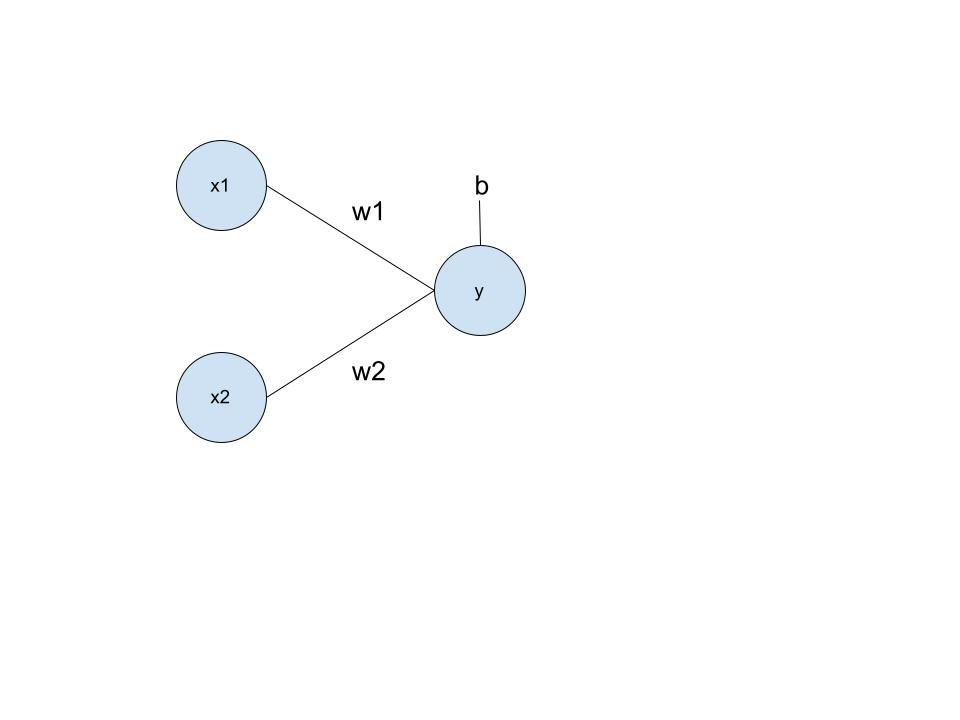

There are two ways to build a neural network.

In [4]:
model_1 = Sequential([
    Dense(1, input_dim=2)])

In [5]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim=2))

We can see from the .summary() that there is no difference between these two ways.

In [ ]:
model_1.summary()

In [ ]:
model_2.summary()

In [ ]:
model_2.get_weights()

We use .get_weights to see the actural value of trainded weight and bias. This is the number of Param # shown above

##Loss function (error between the true values and the predict values)

1. Regression problem

In [9]:
#assume we have y_true and y_predict
y_true = np.array([1,2,3,4])
y_predict = np.array([0,1,2,4])

in this case we use the loss: mean squared error (MSE).

$$
L =  \frac{1}{n} \sum_{i=1}^{n}(\text{y_true}_i-\text{y_predict}_i)^2
$$

In [10]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

In [ ]:
loss = mse(y_true, y_predict)
print(loss)

2. Binary classification problem

In [12]:
#assume we have y_true and y_predict
y_true = np.array([1,1,0,0])
y_predict = np.array([0.9,0.7,0.1,0.4])

in this case we use binary cross entropy

$$
L = - \frac{1}{n} \sum_{i=1}^{n} [\text{y_true}_i \log(\text{y_predict}_i) + (1-\text{y_true}_i) \log(1-\text{y_predict}_i))]
$$



In [13]:
def binary_ce(y_true, y_predict):
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))
  return loss

In [ ]:
loss = binary_ce(y_true, y_predict)
print(loss)

let's see what will happen in four extreme cases.

In [ ]:
y_true = np.array([1])
y_predict = np.array([0])
loss = binary_ce(y_true, y_predict)
print(loss)

In [ ]:
y_true = np.array([1])
y_predict = np.array([0.9999999999])
loss = binary_ce(y_true, y_predict)
print(loss)

In [ ]:
y_true = np.array([0])
y_predict = np.array([1])
loss = binary_ce(y_true, y_predict)
print(loss)

In [ ]:
y_true = np.array([0])
y_predict = np.array([0.0000000001])
loss = binary_ce(y_true, y_predict)
print(loss)

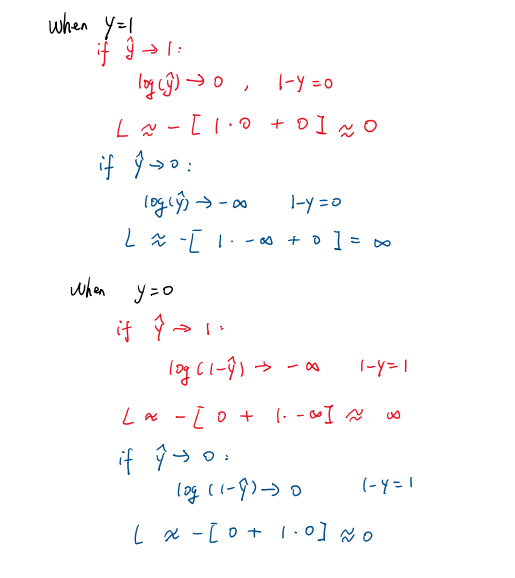

3. Classification problem

In this case we can use categorical cross entropy

$$
L = -\sum_{i=1}^{C} \text{y_true}_i \log(\text{y_predict}_i)
$$



## Gradient (Backpropagation part 1)

Assume we use the function wx + b to solve the regression problem. We can build a neural network like this:

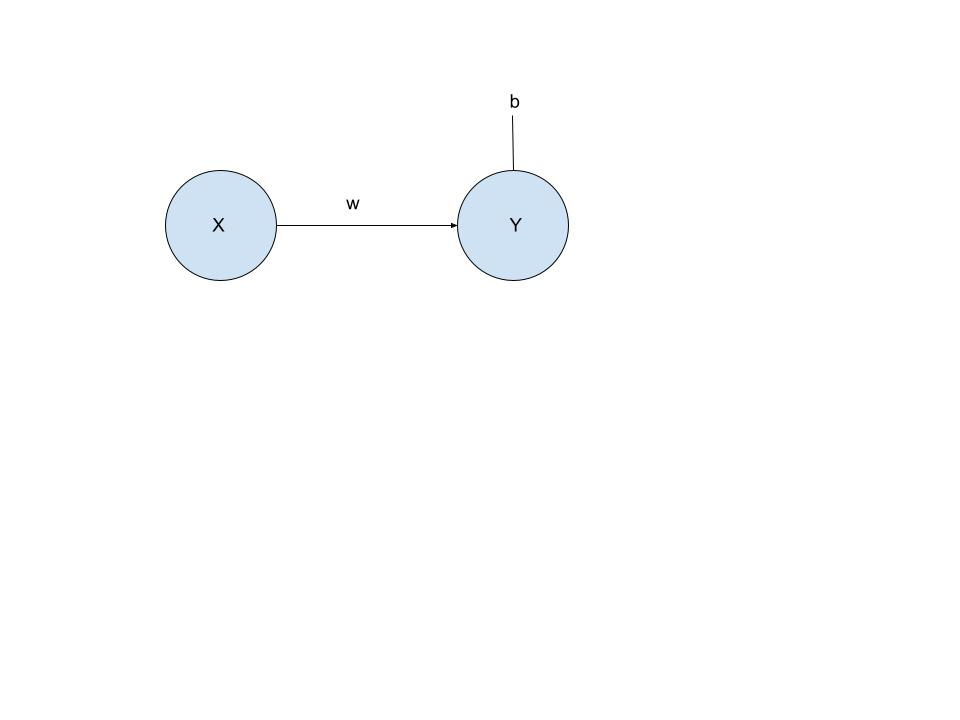

In [19]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 5, 7, 9, 11])

In [20]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


w_values = np.linspace(-1, 4, 100)
b_values = np.linspace(-1, 4, 100)


w_values, b_values = np.meshgrid(w_values, b_values)

#calculate mse corresponding to w and b
mse_values = np.array([mse(Y, w*X + b) for w, b in zip(np.ravel(w_values), np.ravel(b_values))])
mse_values = mse_values.reshape(w_values.shape)


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(w_values, b_values, mse_values)


ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
plt.title('MSE')
plt.show()


if we fix w into 2 for example, we can plot the relation ship between MSE and b

In [ ]:
w = 2


b_values = np.linspace(-10, 10, 200)

#calculate mse corresponding to b
mse_values = [mse(Y, w*X + b) for b in b_values]


plt.plot(b_values, mse_values)
plt.xlabel('b')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


similarly for fixed b = 1

In [ ]:
b = 1

w_values = np.linspace(-10, 10, 200)

#calculate mse corresponding to w
mse_values = [mse(Y, w*X + b) for w in w_values]


plt.plot(w_values, mse_values)
plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [24]:
from sympy import symbols, diff

X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 5, 7, 9, 11])

#define the symbols
w, b = symbols('w b')
y_pred = w * X + b

mse_diff = np.mean(np.square(Y - y_pred))

# partial derivative to w and b
dw = diff(mse_diff, w)
db = diff(mse_diff, b)

In [ ]:
print(dw)
print(db)

So let's assume b to be 1, and w to be 0

In [26]:
k_temp = 6 + 0 - 50
b_temp = mse(Y,np.array([1,1,1,1,1]))

In [ ]:
b = 1

w_values = np.linspace(-5, 5, 200)

#calculate mse corresponding to w
mse_values = [mse(Y, w*X + b) for w in w_values]



plt.plot(w_values, mse_values, label='mse value')

#plot the tangent line
plt.plot(w_values, k_temp*w_values + b_temp,label='tangent line')

plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

We can see that the partial derivative of the point is just the slope of the point. This means that the mse value drop fastest when dropping in this way.

##Train a network (regression)

In [28]:
X = np.array([1,2,3,4,5])
Y = np.array([3,5,7,9,11])

In [ ]:
plt.scatter(X,Y,label='original points')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
model_nn1 = Sequential([
    Dense(1, input_dim=1)])

model_nn1.summary()

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.5)
model_nn1.compile(loss='mse', optimizer=adam)
model_nn1.fit(X, Y, epochs=200)

We use .get_weights to see the actural value of trainded weight and bias.

In [ ]:
weights=model_nn1.get_weights()
print(weights)

In [ ]:
plt.scatter(X,Y,label='original points')

x1 = np.linspace(0,5,10)
y1 = weights[0]*x1 + weights[1]
plt.plot(x1,y1.reshape(10,),color='orange',label='regression line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##Train a network (binary classification)

In [34]:
X = np.concatenate([np.random.rand(50, 2) * 0.2, np.random.rand(50, 2) * 0.2 + 0.8])
Y = np.concatenate([np.zeros(50), np.ones(50)])

In [ ]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
model_nn2 = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')  #we will talk about this activation later
])

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model_nn2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn2.fit(X, Y, epochs=100)

In [ ]:
weights=model_nn2.get_weights()
print(weights)

In [ ]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')

x1 = np.linspace(0,1,10)


#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0
x2 = -(weights[0][0]*x1 + weights[1])/weights[0][1]


plt.plot(x1,x2,color='green',label='decision boundary')


plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()

Let's talk about why we set activation='sigmoid' and why the line drawn above is the decision boundary.

A sigmoid function looks like this

In [ ]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

When we set activation='sigmoid', we apply the sigmoid function to the output result.

It looks like this:

output = sigmoid(w1*x1 + w2*x2 + b)

it squashes the output values between 0 and 1, and the decision boundary is 0.5

when sigmoid(w1*x1 + w2*x2 + b) = 0.5 , actually, from the graph we can see that, it is equivalent that 1*x1 + w2*x2 + b = 0

##Activation function

Why we add activation function?

-- To solve the non-linear problem

-- To squash the output values

This first comes up when trying to solve the XOR problem

In [ ]:
X = np.array(([0,0],[1,1],[1,0],[0,1]))
Y = np.array([0,0,1,1])
plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

A linear classifier will never solve this problem.

Let's try.

In [ ]:
model_nn3 = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model_nn3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn3.fit(X, Y, epochs=100)

In [ ]:
weights=model_nn3.get_weights()
print(weights)

plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')

x1 = np.linspace(0,1,10)
x2 = -(weights[0][0]*x1 + weights[1])/weights[0][1]

#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0


plt.plot(x1,x2,color='green',label='decision boundary')



plt.legend()
plt.show()

We can add the nonlinearity by using activation function & adding hidden layers.

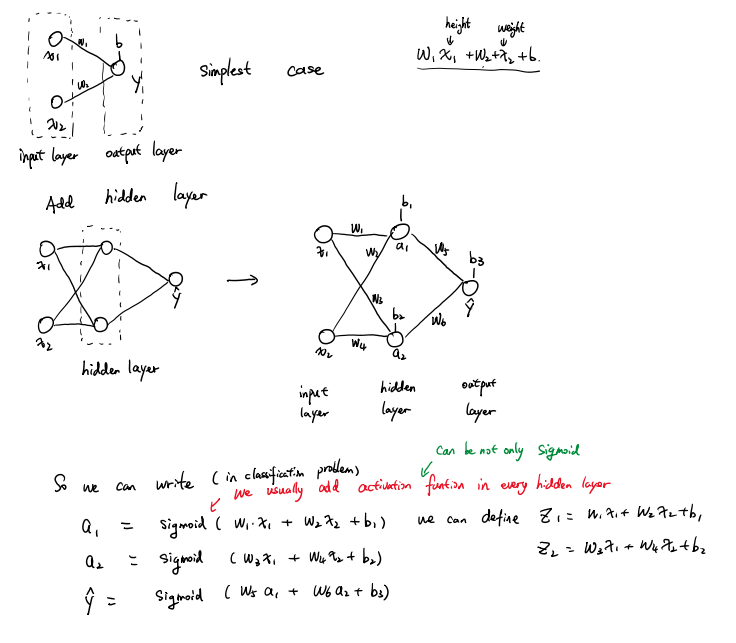

In [ ]:
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

model_nn4 = Sequential([
    Dense(2,input_dim=2, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

weights = [np.array([[20, -20], [20, -20]]), np.array([-10, 30]), np.array([[20], [20]]), np.array([-10])]
model_nn4.set_weights(weights)

# lr = ExponentialDecay(
#     initial_learning_rate=0.1,
#     decay_steps=200,
#     decay_rate=0.5)

adam = tf.keras.optimizers.Adam(learning_rate=0.5)

model_nn4.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn4.fit(X, Y, epochs=200)

In [ ]:
model_nn4.summary()

Now we try drawing the decision boundary

In [ ]:
weights=model_nn4.get_weights()
print(weights)

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = model_nn4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.contour(xx, yy, Z, levels=[0.5], cmap='Greys', vmin=0, vmax=0.6)

plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')

plt.legend()
plt.show()


Another example

In [ ]:
X = np.array(([1,0],[2,1],[0,1],[1,2],[0.5,0.5],[0.5,1.5],[1.5,0.5],[1.5,1.5]))
Y = np.array([0,0,0,0,1,1,1,1])
plt.scatter(X[0:4,0],X[0:4,1],label='0')
plt.scatter(X[4:8,0],X[4:8,1],label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
model_nn5 = Sequential([
    Dense(10,input_dim=2, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.05)

model_nn5.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn5.fit(X, Y, epochs=200)

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = model_nn5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.contour(xx, yy, Z, levels=[0.5], cmap='Greys', vmin=0, vmax=0.6)

plt.scatter(X[0:4,0],X[0:4,1],label='0')
plt.scatter(X[4:8,0],X[4:8,1],label='1')

plt.legend()
plt.show()

Here are somecommonly used activation functions:

Sigmoid function

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$


In [50]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

ReLU function

$$
\text{ReLU}(x) = \max(0, x)
$$


In [52]:
def relu(x):
  y = np.maximum(0,x)
  return y

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,relu(x))
plt.grid(True)
plt.show()

tanh function

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$


In [54]:
def tanh(x):
  y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return y

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,tanh(x))
plt.grid(True)
plt.show()

Softmax function

$$
\text{Softmax}(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$


## Backpropagation part 2

How can we calculate the partial derivative when having so many units also combined with activation functions?

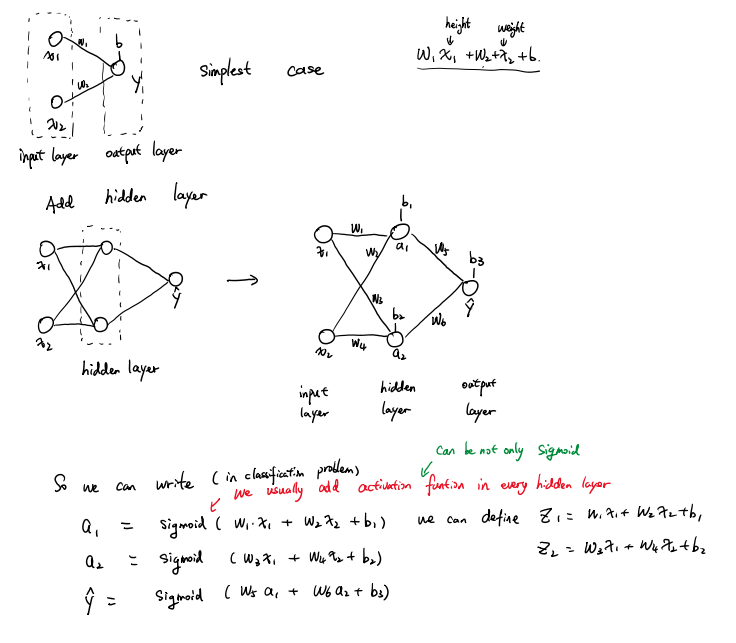

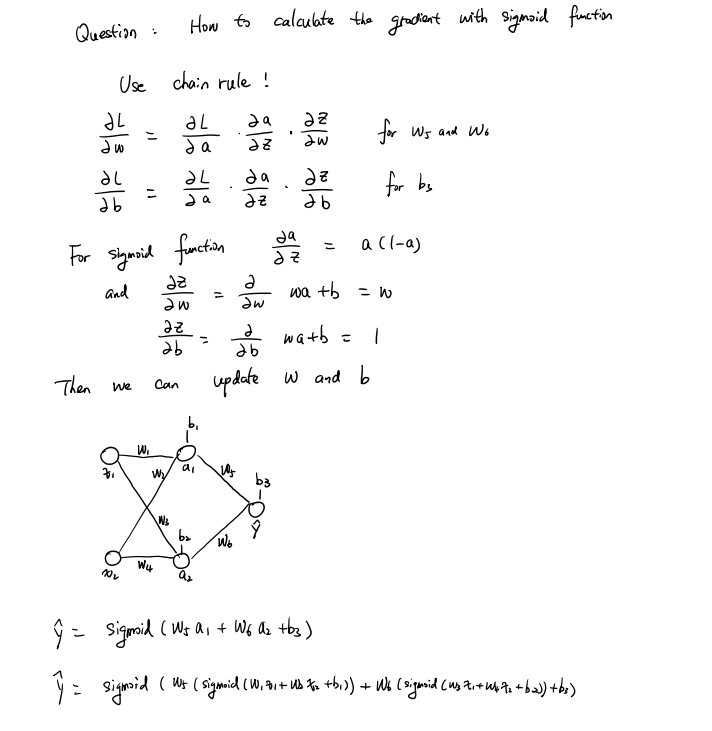

## Data split

In machine learning and deep learning, we typically divide our dataset into three parts: a training set, a test set, and a validation set.

1. Training Set: This portion of the data is used for **training the model**
. By feeding the model with the training data, it continuously adjusts its internal parameters so that it can learn and predict better.

2. Validation Set: This portion of the data is used to **evaluate the model's performance during training and adjust hyperparameters**. For instance, you might change the learning rate, optimizer, or even the model's structure to improve the model's performance on the validation set. Typically, we train multiple models (or versions of the same model) on the training set, and then select the model that performs best on the validation set.

3. Test Set: This portion of the data is used to **test the model's performance after training is complete**. This is data that the model has never seen during training, and it reflects how the model would perform in real-world applications. The performance on the test set is an important measure of the model's generalization ability.

An important point in the training and selection of models is not to use the test set for training or for adjusting model parameters. This is because if we use the test set to adjust model parameters, we're essentially "overfitting" to the test set, and this doesn't accurately reflect the model's ability to generalize.

##CNN

Here is a fully connected neural network looks like.
It's trying to use factors like height, weight, blood pressure, gender, sleeping time to solve a binary classification problem, let's say, healthy or not.

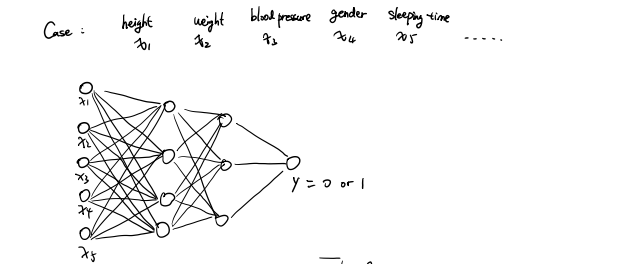

But if our data is image, how can we deal with this problem?

Here we load the hand-written numbers data

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Training data shape: {train_images.shape}')
print(f'Number of training labels: {train_labels.shape}')
print(f'Testing data shape: {test_images.shape}')
print(f'Number of testing labels: {test_labels.shape}')


This is an example of the data

In [ ]:
plt.imshow(train_images[0],cmap='gray')
plt.show

A common thought is to flatten these images into column vectors and send them into fully connected neural network.

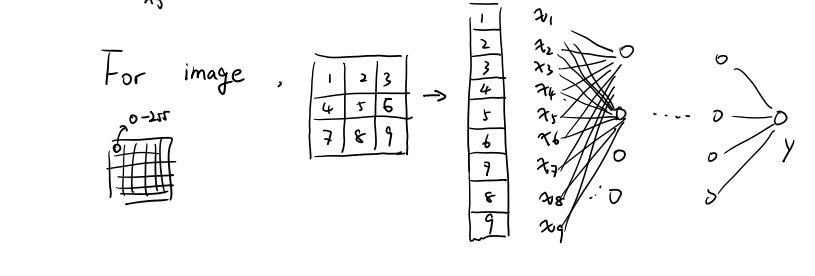

Let's try

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model_mnist = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_mnist.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_mnist.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model_mnist.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


But this operation may cause some problems.

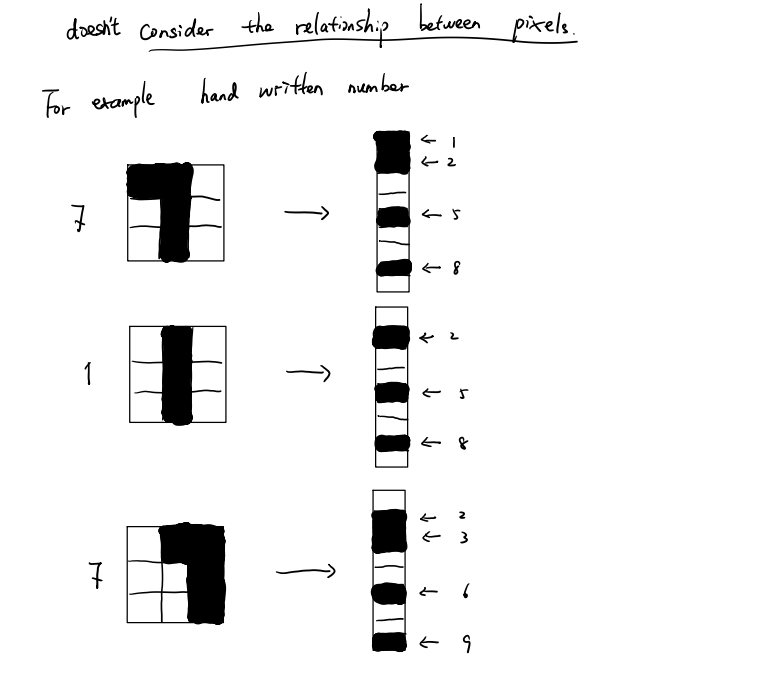

3 reasons why fully connected neural network doesn't work well (we assume the input size is (M × N × C) where C is the number of input channels (e.g., C = 3 for RGB color)):
  1. we need to learn weight matrices W of different sizes for each input image of different sizes.
  2. even if the input is of fixed size, since the weight matrix is of size (M × N × C) × D, where D is the number of outputs (hidden units), the required number of parameters becomes unmanageable, for comparable For the size of the image, this is not feasible.
  3. when a pattern occurs in different locations, it may not be recognized, that is, the model may not be **translation invariant** because the weights are not shared across locations (see the above figure)

**Purpose**: to detect features such as edges, corners, colors, textures, or even high-level features like shapes or objects, depending on the layer depth in the model.

**Convolution Operation**: The input image is represented as a matrix of pixel values. The convolution operation is performed by sliding the filter over this input matrix. The filter is a small matrix of weights, which are learned during the training phase. At each location, a dot product operation (multiplication and summation) is performed between the filter and the portion of the image it currently covers, to produce a single value in the output feature map (or convolved feature). This process is repeated across the entire image.

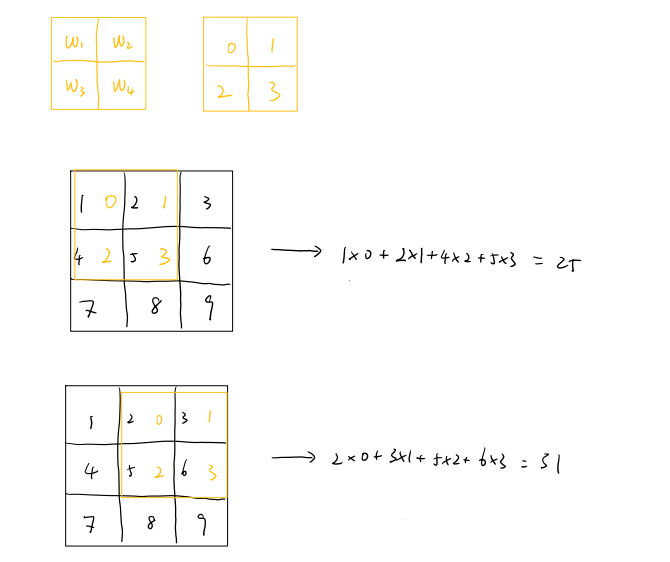

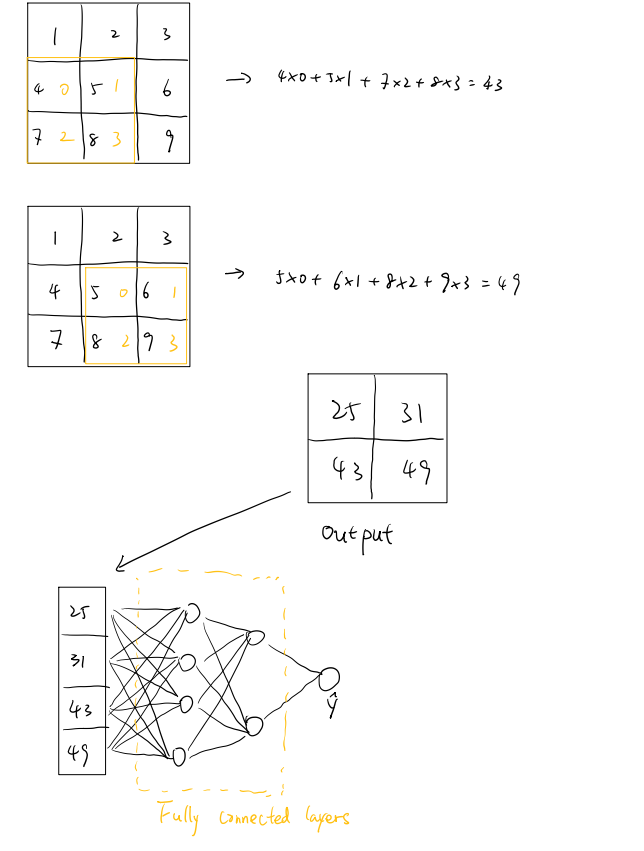

We often add fully connected layers after we finish the convolution operation.

We actually can view cnn as a non-fully connected shared parameters neural network.

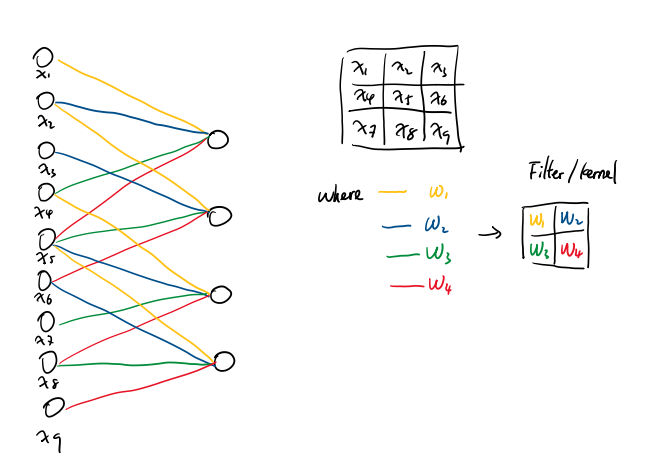

We usually use multiple kernels/filters to extract features like edges, corners...
For example if we use 3 2×2 kernels, the output will be like

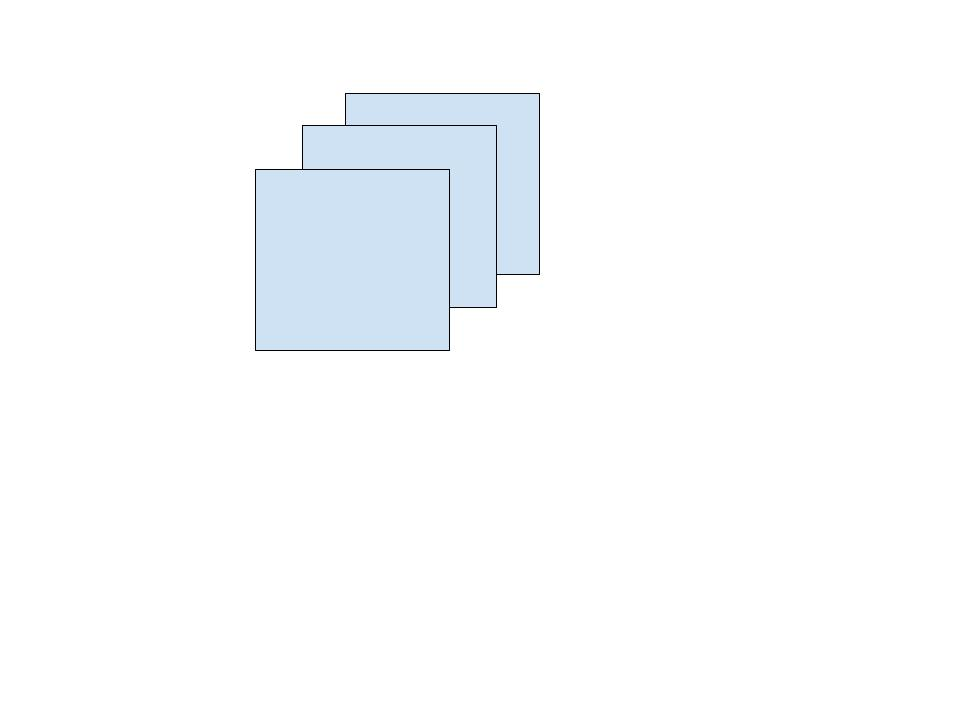

using multiple convolutional layers combining with other layers(we will talk about this later) it will eventually be like this

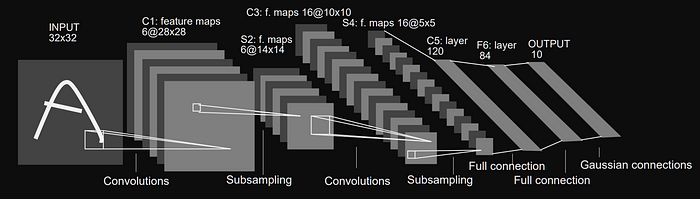

How to apply this in tensorflow:


    tf.keras.layers.Conv2D

  1. Filters: number of kernels(filters)

  2. Kernel_size: the size of the kernel (An integer or tuple/list of 2 integers)

  3. Strides: the step when kernel slides along the image (An integer or tuple/list of 2 integers)

  4. Padding: selected from “valid” and “same”. “same”  results in padding with zeros evenly to the left/right or up/down of the input. “valid” means no padding.
  (Hint:  When padding="same" and strides=1, the output has the same size as the input.)

  5. Activations: The activation function used in the layer. Common ones: ReLU, Sigmoid

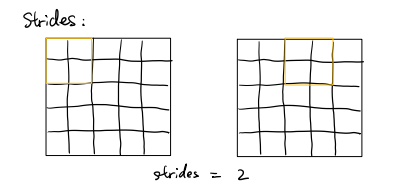

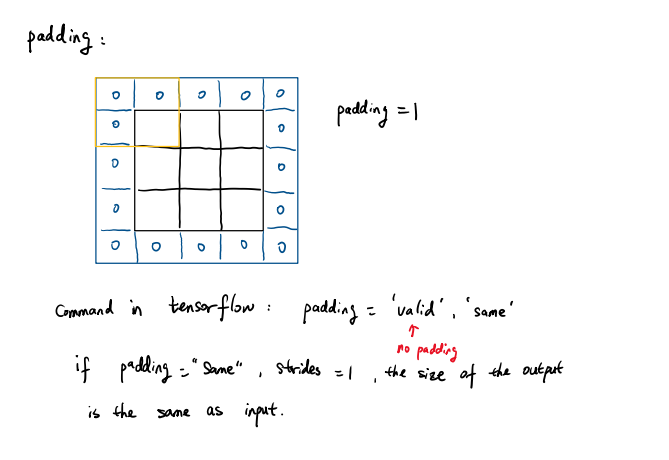

**Pooling layers**: a layer used in downsampling. It can make the network less computationally intensive and controlling overfitting. Layers that most commonly used:

Max pooling: takes the maximum value from the portion of the image covered by the window.

Average pooling: takes the average of the values from the portion of the image covered by the window.

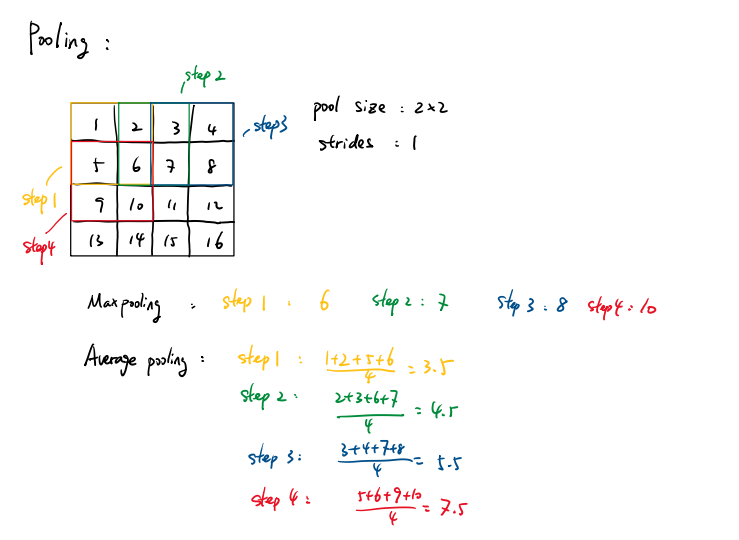

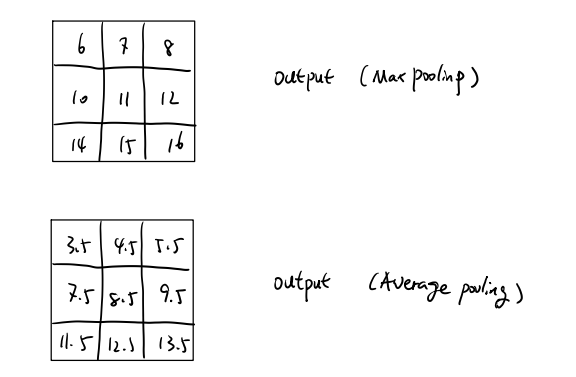

How we apply this in tensorflow:

    tf.keras.layers.MaxPooling2D

1. Pool_size: the size of the pooling window (integer or tuple of 2 integers)

2. Strides: Specifies how far the pooling window moves for each pooling step (Integer, tuple of 2 integers, or None.)
3. Padding: selected from “valid” and “same”.  “same”  results in padding with zeros evenly to the left/right or up/down of the input. “valid” means no padding.

Let's try build a convolutional neural network.

In [ ]:
#load the data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Training data shape: {train_images.shape}')
print(f'Number of training labels: {train_labels.shape}')
print(f'Testing data shape: {test_images.shape}')
print(f'Number of testing labels: {test_labels.shape}')


In [ ]:
#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model_cnn = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=14, kernel_size=4,activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=7, kernel_size=3,activation='relu'),
    MaxPooling2D(),
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_cnn.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

We can see that in test dataset, the accuracy is higher than the one using only fully connected neural network.

## CNN supplementary knowledge

Layers

**2D Convolutional layers**: 2D convolutional layer is a fundamental concept in the field of computer vision. The purpose of the 2D convolution operation is to extract features from the input image, such as edges, corners, and other relevant information, to allow the model to learn from this data.

**Pooling layers**: a layer used in downsampling. It can make the network less computationally intensive and controlling overfitting. Layers that most commonly used:

1. Max pooling: takes the maximum value from the portion of the image covered by the window.

2. Average pooling: takes the average of the values from the portion of the image covered by the window.

**Normalization layers**: Normalization layers normalize the activations of the network's hidden layers, allowing for faster convergence and reducing the likelihood of vanishing or exploding gradients. By normalizing the inputs to each layer, the network becomes more robust to variations in data, leading to improved generalization and better overall performance. Layers that most commonly used:

1. Batch Normalization: operates on mini-batches of training data by subtracting the mean and dividing by the standard deviation of the batch. This makes the mean to be 0, variance to be 1. (Most commonly used especially in CNN)
2. Layer Normalization: Layer normalization performs normalization across each output of a layer, instead of across batches of data. This means that in layer normalization, all neurons in the same layer are normalized with the same mean and variance.
3. Group Normalization: divides channels into small sub-groups and performs normalization on these groups.

4. Unit Normalization: to transform the original features so that they have a Euclidean length (or L2 norm) of 1. In other words, this normalization scales the values of a vector so that it lies on a unit sphere (i.e., its length or magnitude is 1).

**Dropout layers**: Dropout layers help prevent overfitting. During each training iteration, a certain percentage of the neuron outputs are set to zero.

**Flatten layers**: flatten the input into a one-dimensional array.

**Dense layers**: AKA fully connected layers. It is a layer with multiple neurons. Each neuron is connected to every neuron in the previous layer. Every connection between neurons is associated with a weight parameter. Bias term should also be noticed. Dense layers is also used to give the final prediction.

**2D Convolutional layers**:

    tf.keras.layers.Conv2D
1. Filters: number of kernels(filters)
2. Kernel_size: the size of the kernel (An integer or tuple/list of 2 integers)
Strides: the step when kernel slides along the image (An integer or tuple/list of 2 integers)
3. Padding: selected from “valid” and “same”. “same”  results in padding with zeros evenly to the left/right or up/down of the input. “valid” means no padding.
(Hint:  When padding="same" and strides=1, the output has the same size as the input.)
4. Activations: The activation function used in the layer. Common ones: ReLU, Sigmoid

**Pooling layers**:

    tf.keras.layers.MaxPooling2D
1. Pool_size: the size of the pooling window (integer or tuple of 2 integers)
2. Strides: Specifies how far the pooling window moves for each pooling step (Integer, tuple of 2 integers, or None.)
3. Padding: selected from “valid” and “same”.  “same”  results in padding with zeros evenly to the left/right or up/down of the input. “valid” means no padding.


    tf.keras.layers.AveragePooling2D

1. Pool_size: the size of the pooling window (integer or tuple of 2 integers)
2. Strides: Specifies how far the pooling window moves for each pooling step (Integer, tuple of 2 integers, or None.)
3. Padding: selected from “valid” and “same”.  “same”  results in padding with zeros evenly to the left/right or up/down of the input. “valid” means no padding.

**Normalization layers**:

tf.keras.layers.BatchNormalization

1. Momentum: determines how much of the past information will be used in the current calculation (typical values: 0.9, 0.99, 0.999 (close to 1))
2. Epsilon: Small float added to variance to avoid dividing by zero

**Dropout layers**:

    tf.keras.layers.Dropout

1. Rate: Fraction of the input units to drop.(float between 0 and 1)

**Flatten layers**:

    tf.keras.layers.Flatten

**Dense layers (Fully Connected layers)**:

    tf.keras.layers.Dense

1. units: number of neurons (positive integer)
2. activation: activation function to use (ReLU, Sigmoid, tanh). If don't specify anything, no activation is applied.
3. Use_bias: whether the layer uses a bias vector (Boolean)

**Input**:

    tf.keras.Input
1. Shape: A shape tuple (integers), not including the batch size.

How to calculate the trainable parameters:

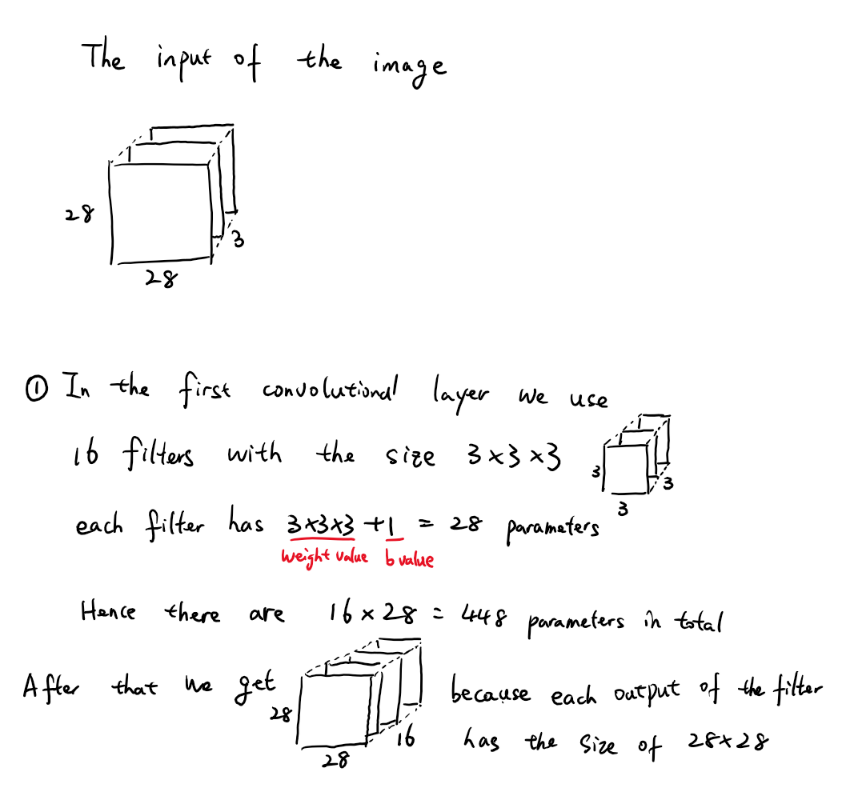

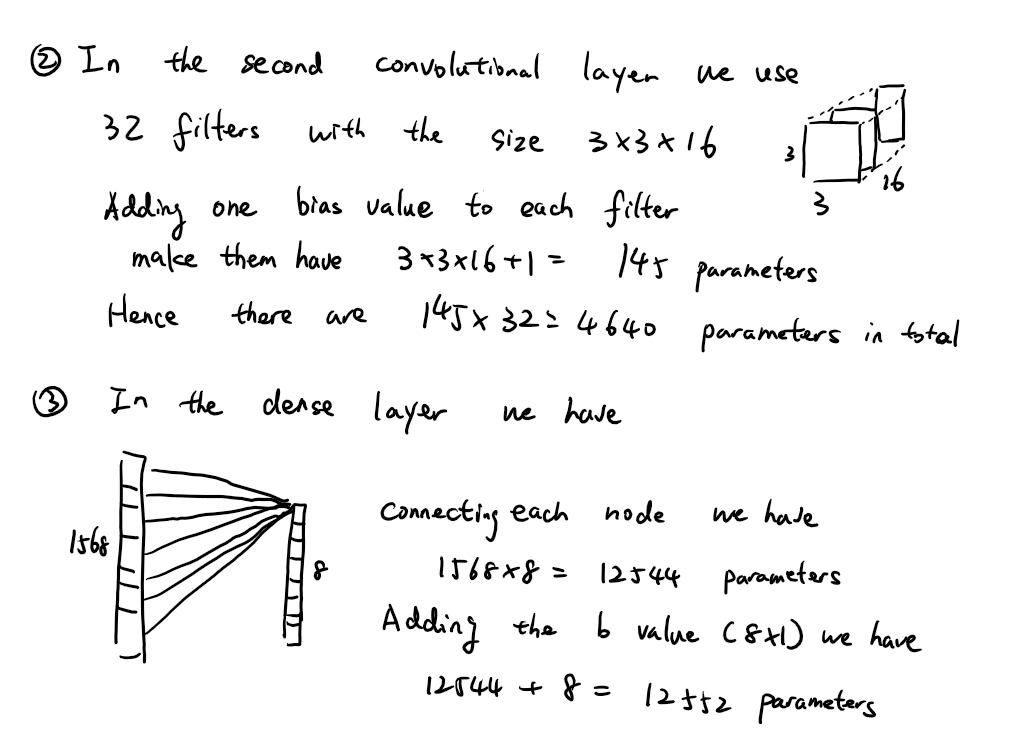

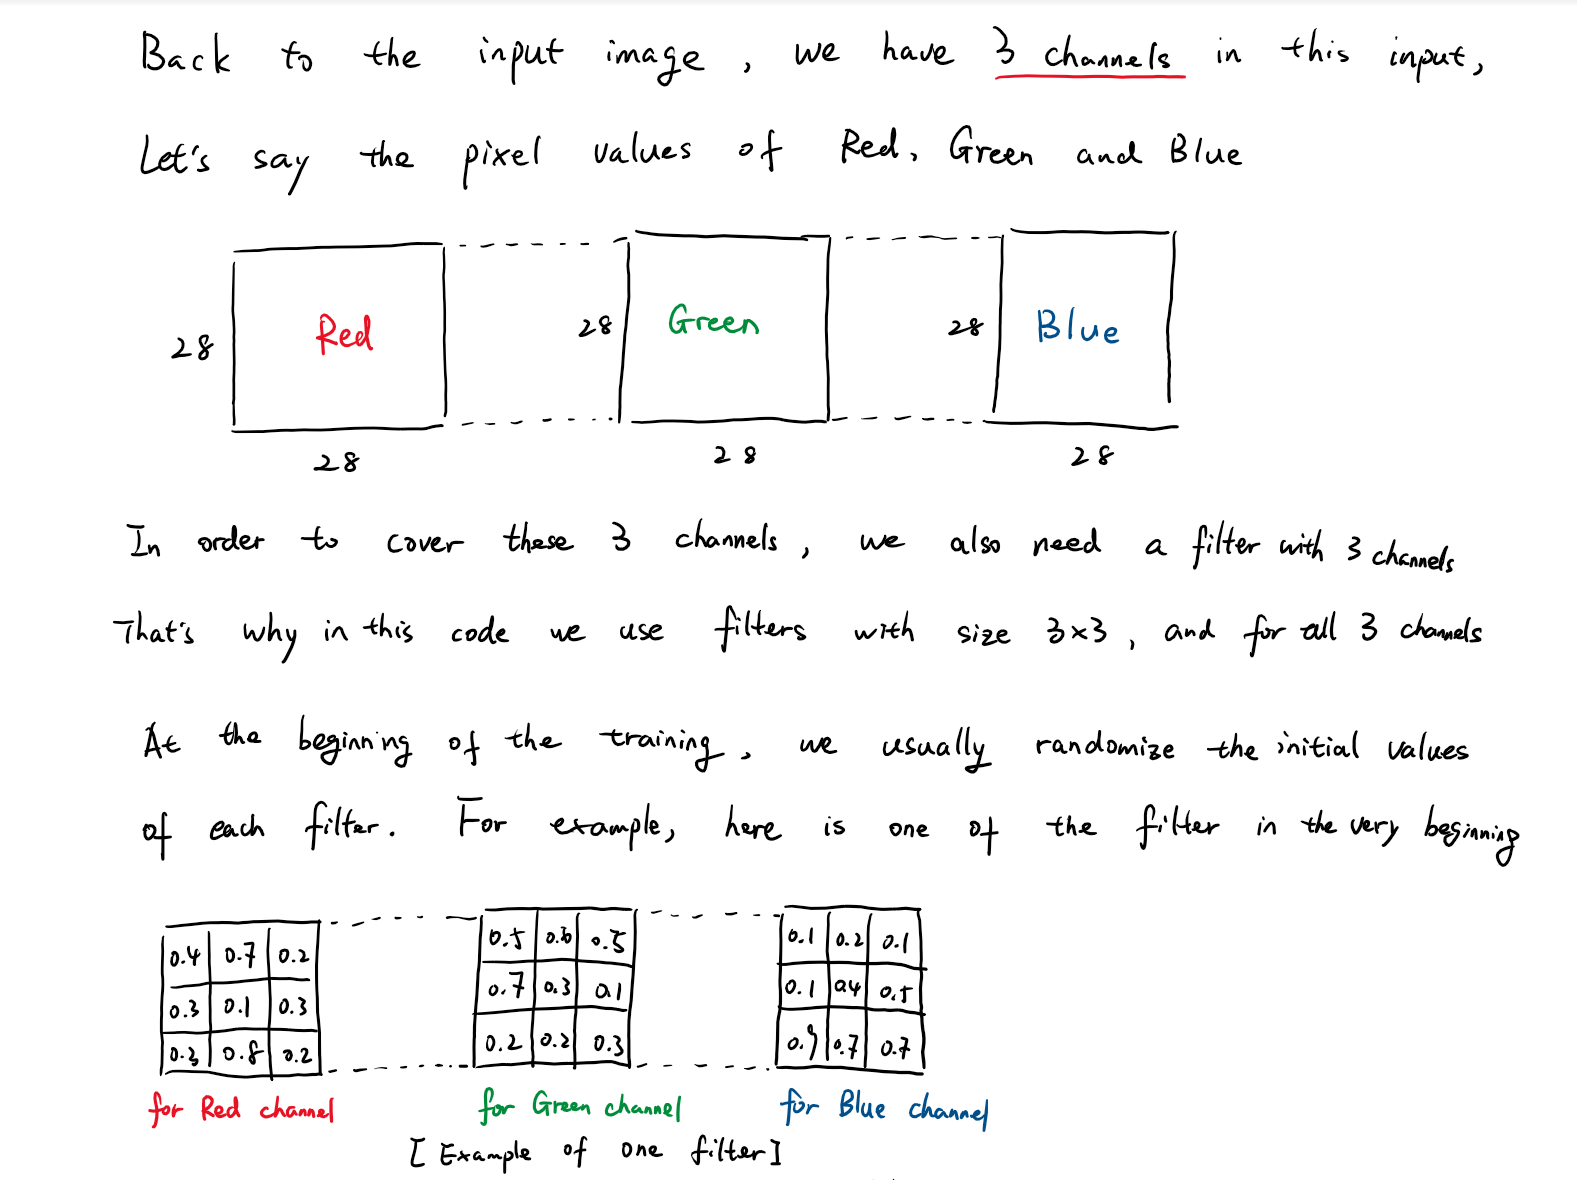

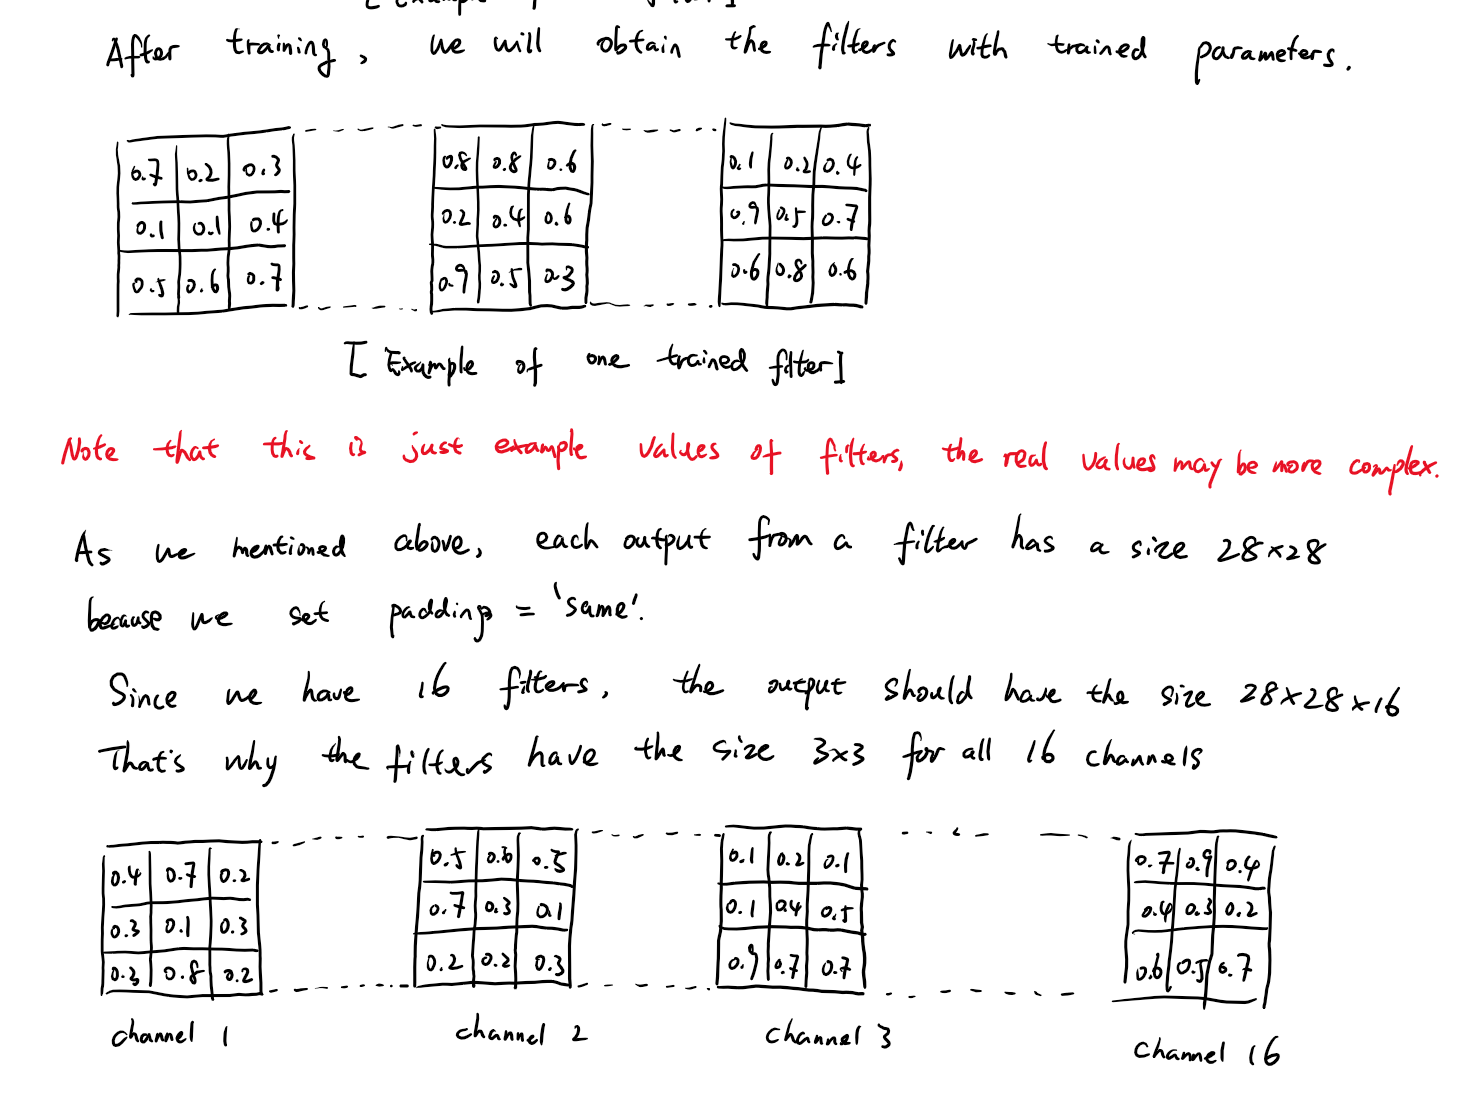

How to calculate the output shapes:

For Convolutional Layer:

O = output image shape

I = input image shape

K = kernel size

N = number of filters

S = strides

P = padding

Then we have:

$$
O = \frac{I-K+2P}{S} + 1
$$

For pooling layer:

O = output image shape

I = input image shape

S = strides

Ps = pool size

Then we have:

$$
O = \frac{I-P_s}{S} + 1
$$


For flatten layer:

We can just multiply the number of the input shape